In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Legion/OneDrive/Desktop/Manasi/Topmentor/Exam/Data.csv", delimiter = ";")
data

,surface,rooms_new,zipcode_new,price_new,latitude,longitude
0,138.0,4.0,1060,420000,40.804673,-73.963420
1,130.0,5.0,1087,550000,52.355590,5.000561
2,116.0,5.0,1061,425000,52.373044,4.837568
3,92.0,5.0,1035,349511,52.416895,4.906767
4,127.0,4.0,1013,1050000,52.396789,4.876607
...,...,...,...,...,...,...
2186,12.0,NaN,1019,40000,52.372858,4.938828
2187,12.0,NaN,1019,40000,52.372858,4.938828
2188,12.0,NaN,1019,40000,52.372858,4.938828
2189,12.0,NaN,1019,40000,52.372858,4.938828


In [3]:
data.columns = ['surface', 'rooms', 'zipcode', 'price', 'latitude', 'longitude']

In [4]:
df = data.copy()
df

,surface,rooms,zipcode,price,latitude,longitude
0,138.0,4.0,1060,420000,40.804673,-73.963420
1,130.0,5.0,1087,550000,52.355590,5.000561
2,116.0,5.0,1061,425000,52.373044,4.837568
3,92.0,5.0,1035,349511,52.416895,4.906767
4,127.0,4.0,1013,1050000,52.396789,4.876607
...,...,...,...,...,...,...
2186,12.0,NaN,1019,40000,52.372858,4.938828
2187,12.0,NaN,1019,40000,52.372858,4.938828
2188,12.0,NaN,1019,40000,52.372858,4.938828
2189,12.0,NaN,1019,40000,52.372858,4.938828


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   surface    2191 non-null   float64
 1   rooms      2163 non-null   float64
 2   zipcode    2191 non-null   int64  
 3   price      2191 non-null   object 
 4   latitude   2191 non-null   float64
 5   longitude  2191 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 102.8+ KB


In [6]:
df.isnull().sum()

surface       0
rooms        28
zipcode       0
price         0
latitude      0
longitude     0
dtype: int64

In [7]:
df = df.apply(pd.to_numeric, errors='coerce')

In [8]:
df['rooms'].fillna(df['rooms'].median(), inplace=True)

In [9]:
data.dropna(subset=['price'], inplace=True)

In [10]:
df.isnull().sum()

surface      0
rooms        0
zipcode      0
price        9
latitude     0
longitude    0
dtype: int64

In [11]:
df.fillna(df.median(), inplace=True)

In [12]:
df.isnull().sum()

surface      0
rooms        0
zipcode      0
price        0
latitude     0
longitude    0
dtype: int64

In [13]:
df.head()

,surface,rooms,zipcode,price,latitude,longitude
0,138.0,4.0,1060,420000.0,40.804673,-73.963420
1,130.0,5.0,1087,550000.0,52.355590,5.000561
2,116.0,5.0,1061,425000.0,52.373044,4.837568
3,92.0,5.0,1035,349511.0,52.416895,4.906767
4,127.0,4.0,1013,1050000.0,52.396789,4.876607


In [14]:
df.describe(include='all')

,surface,rooms,zipcode,price,latitude,longitude
count,2191.000000,2191.000000,2191.000000,2.191000e+03,2191.000000,2191.000000
mean,107.827596,3.653583,1057.685988,5.953427e+05,52.072183,2.911381
std,70.531668,1.549204,29.065993,6.180228e+05,1.808644,12.338660
min,4.262000,0.000000,1011.000000,1.000000e+04,40.803320,-73.963962
25%,64.000000,3.000000,1025.000000,2.862500e+05,52.351124,4.854486
50%,91.000000,3.000000,1061.000000,4.000000e+05,52.361286,4.885109
75%,130.000000,4.000000,1079.000000,6.750000e+05,52.373386,4.918091
max,690.000000,9.000000,1109.000000,6.400000e+06,52.423834,5.014093


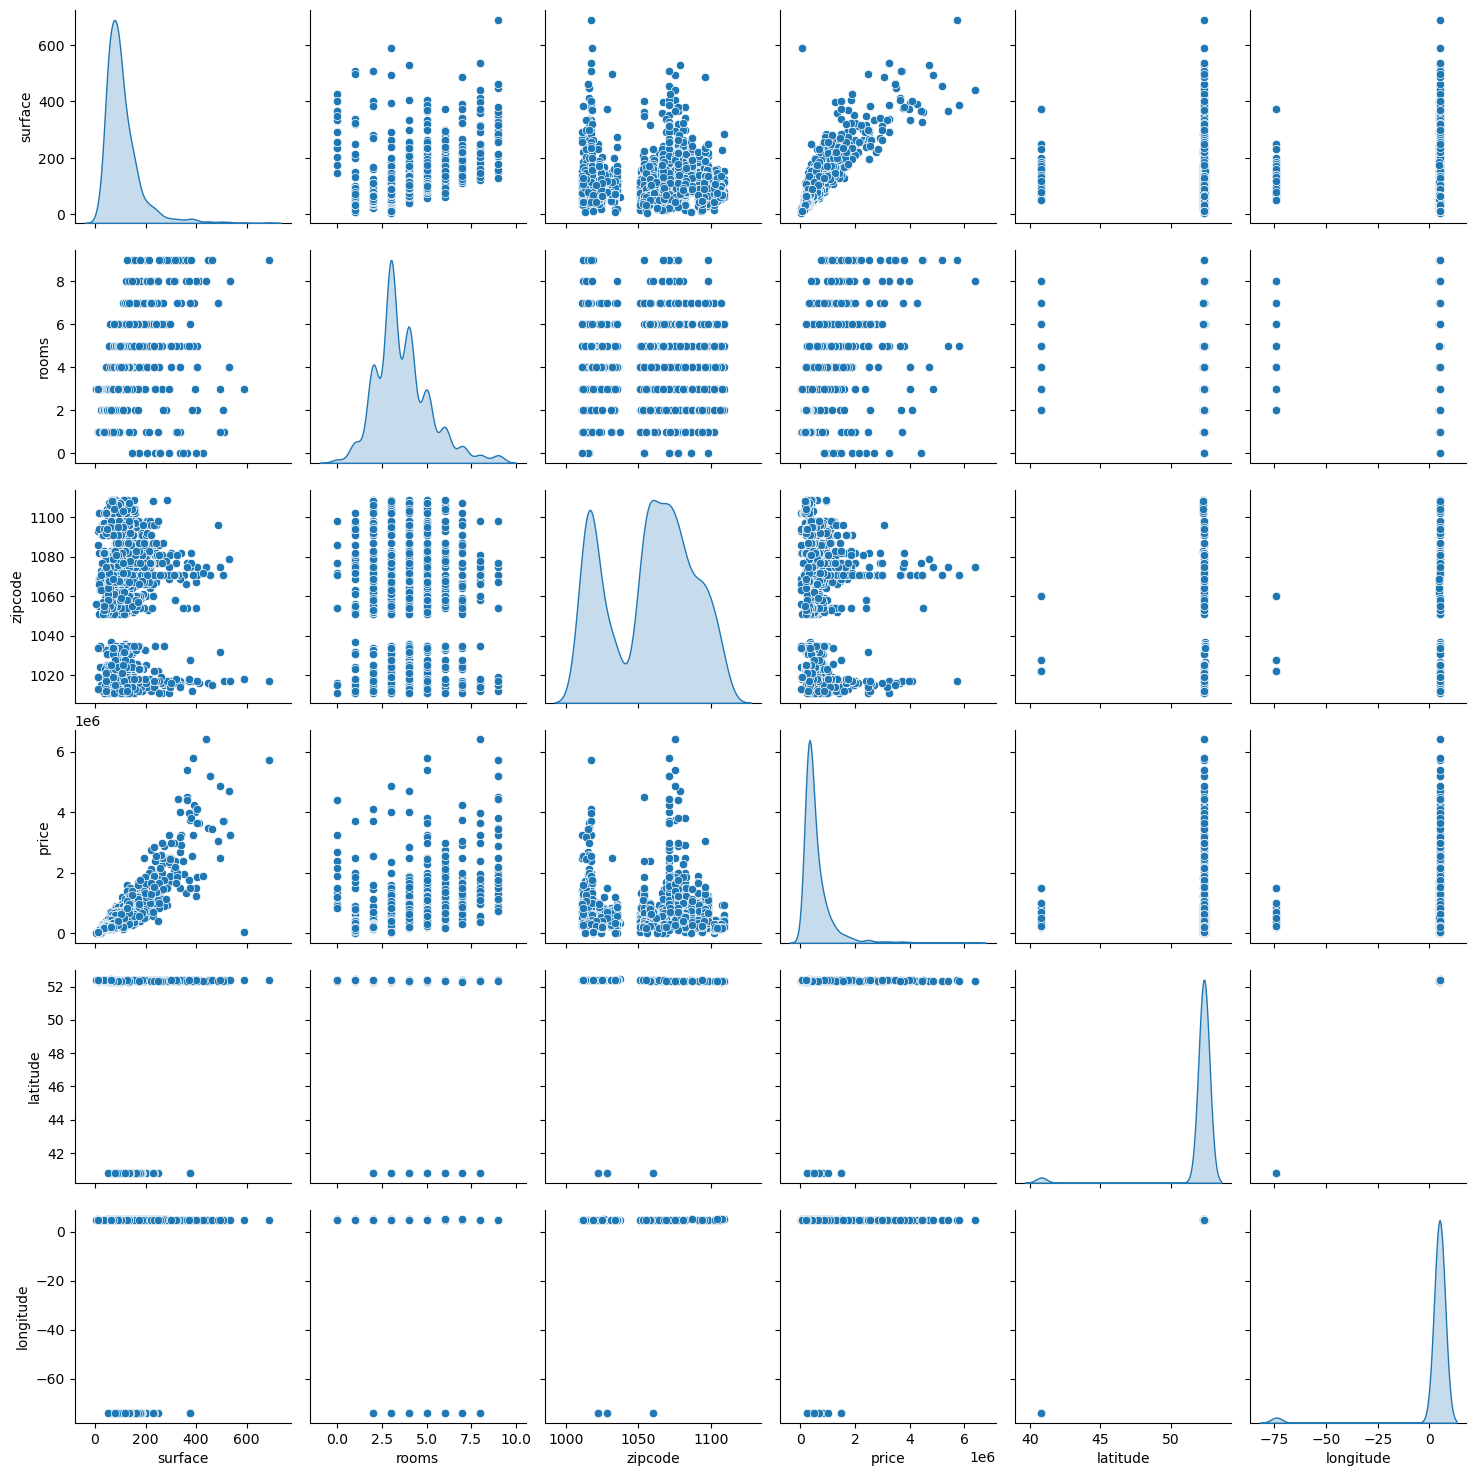

In [15]:
sns.pairplot(df, diag_kind='kde')
plt.show()

C:\Users\Legion\AppData\Local\Temp\ipykernel_15840\2694049295.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


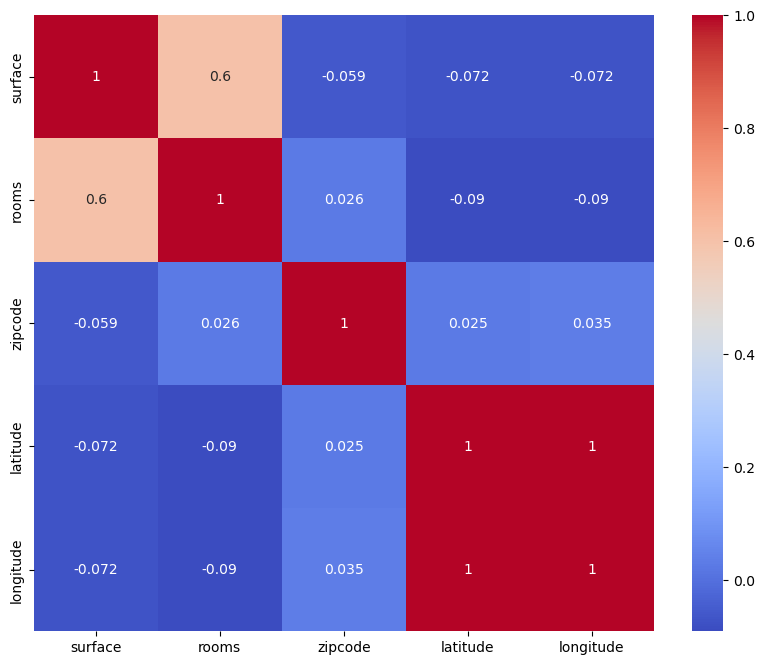

In [16]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
heatmap_fig = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Text(0, 0.5, 'Frequency')

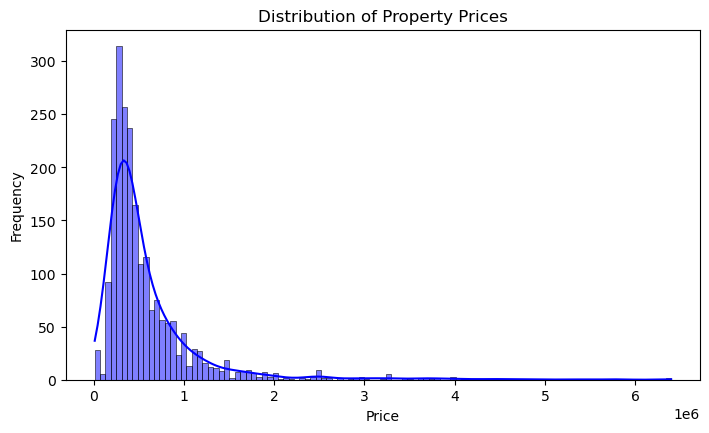

In [17]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

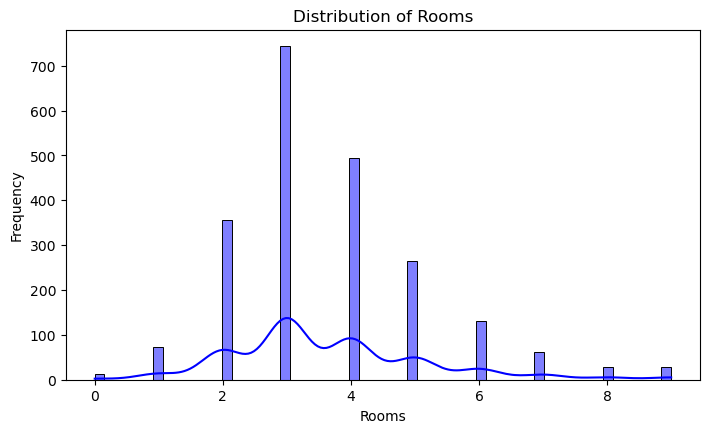

In [19]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['rooms'], kde=True, color='blue')
plt.title('Distribution of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

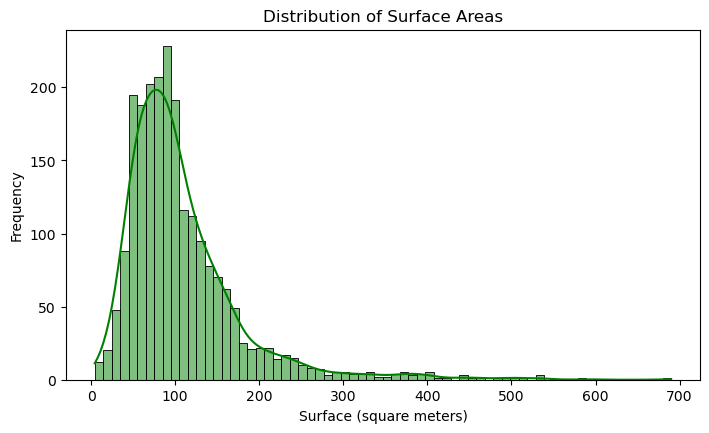

In [18]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 2, 2)
sns.histplot(df['surface'], kde=True, color='green')
plt.title('Distribution of Surface Areas')
plt.xlabel('Surface (square meters)')
plt.ylabel('Frequency')

In [20]:
df['zipcode'].unique()

array([1060, 1087, 1061, 1035, 1013, 1077, 1017, 1025, 1095, 1072, 1098,
       1055, 1079, 1071, 1081, 1062, 1034, 1066, 1022, 1103, 1086, 1023,
       1028, 1012, 1024, 1108, 1069, 1032, 1018, 1051, 1021, 1019, 1053,
       1011, 1064, 1073, 1016, 1082, 1033, 1109, 1026, 1068, 1091, 1056,
       1015, 1057, 1096, 1052, 1094, 1067, 1106, 1075, 1054, 1102, 1063,
       1058, 1083, 1078, 1074, 1097, 1065, 1031, 1059, 1093, 1092, 1107,
       1076, 1104, 1014, 1037, 1027, 1036], dtype=int64)

Text(0, 0.5, 'Number of Rooms')

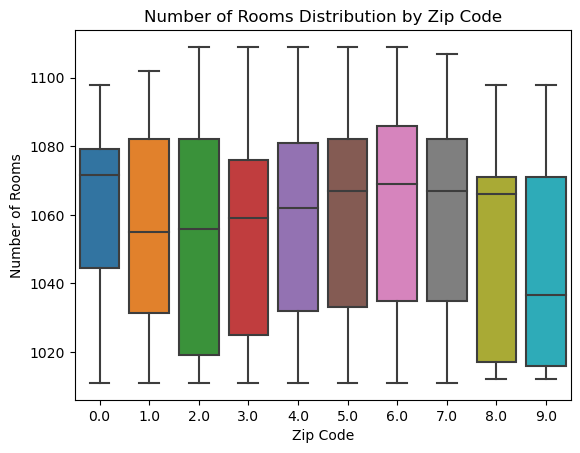

In [48]:
sns.boxplot(x='rooms', y='zipcode', data=df)
plt.title('Number of Rooms Distribution by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Number of Rooms')

In [21]:
import joblib

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
X = df[['surface', 'rooms', 'zipcode', 'latitude', 'longitude']]
y = df['price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((1752, 5), (439, 5), (1752,), (439,))

In [28]:
scaler_path = 'C:/Users/Legion/OneDrive/Desktop/Manasi/Topmentor/Exam/Answers/scaler.joblib'
joblib.dump(scaler, scaler_path)

['C:/Users/Legion/OneDrive/Desktop/Manasi/Topmentor/Exam/Answers/scaler.joblib']

In [29]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [30]:
y_pred_knn = knn.predict(X_test_scaled)

In [31]:
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = mean_squared_error(y_test, y_pred_knn, squared=False)
knn_r2 = r2_score(y_test, y_pred_knn)

In [32]:
knn_mse, knn_rmse, knn_r2

(83353815170.56483, 288710.6079979827, 0.8247743361090153)

In [33]:
linear_model = LinearRegression()

In [34]:
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [35]:
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = knn_mse ** 0.5

In [36]:
knn_r2 = r2_score(y_test, y_pred_knn)
linear_mse = mean_squared_error(y_test, y_pred_linear)

In [37]:
linear_rmse = linear_mse ** 0.5
linear_r2 = r2_score(y_test, y_pred_linear)

In [38]:
linear_mse, linear_rmse, linear_r2

(117372115420.45552, 342596.1404050774, 0.7532613617654613)

In [39]:
if linear_r2 > knn_r2:
    joblib.dump(linear_model, 'C:/Users/Legion/OneDrive/Desktop/Manasi/Topmentor/Exam/Answers/linear_model.joblib')
else:
    joblib.dump(knn, 'C:/Users/Legion/OneDrive/Desktop/Manasi/Topmentor/Exam/Answers/knn_model.joblib')

In [40]:
print(f"Linear Regression R^2: {linear_r2}, MSE: {linear_mse}, RMSE: {linear_rmse}")
print(f"KNN R^2: {knn_r2}, MSE: {knn_mse}, RMSE: {knn_rmse}")

Linear Regression R^2: 0.7532613617654613, MSE: 117372115420.45552, RMSE: 342596.1404050774
KNN R^2: 0.8247743361090153, MSE: 83353815170.56483, RMSE: 288710.6079979827


In [41]:
new_data = pd.DataFrame({
    'surface': [200, 150, 100, 75, 50],  
    'rooms': [5, 4, 3, 2, 1],           
    'zipcode': [1060, 1070, 1080, 1090, 1100],
    'latitude': [52.3600, 52.3650, 52.3700, 52.3750, 52.3800],  
    'longitude': [4.9000, 4.9050, 4.9100, 4.9150, 4.9200] 
})

In [42]:
new_data

,surface,rooms,zipcode,latitude,longitude
0,200,5,1060,52.360,4.900
1,150,4,1070,52.365,4.905
2,100,3,1080,52.370,4.910
3,75,2,1090,52.375,4.915
4,50,1,1100,52.380,4.920


In [43]:
model_path = 'C:/Users/Legion/OneDrive/Desktop/Manasi/Topmentor/Exam/Answers/knn_model.joblib'
knn_model = joblib.load(model_path)

In [44]:
loaded_scaler = joblib.load(scaler_path)

In [45]:
new_data_scaled = scaler.transform(new_data)

In [46]:
predicted_prices = knn_model.predict(new_data_scaled)
print(predicted_prices)

[1367500.  666900.  636900.  370700.  181300.]
